# Proyek Analisis Data: Bike Sharing dataset
- **Nama:** Alieffiea Widya Prawita
- **Email:** alifwidya25@gmail.com
- **ID Dicoding:** asterracea

## Menentukan Pertanyaan Bisnis

1. Bagaimana tren jumlah penyewaan sepeda dalam beberapa tahun terakhir
2. Apakah kondisi cuaca mempengaruhi jumlah pengguna sepeda?


## Import Semua Packages/Library yang Digunakan

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Data Wrangling

### Gathering Data

In [31]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [32]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

menilai data day_df

In [33]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [34]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


cek missing value

In [35]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [36]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

tidak terdapat missing value pada kedua data

cek duplikasi

In [37]:
print("Jumlah duplikasi tabel day: ", day_df.duplicated().sum())

Jumlah duplikasi tabel day:  0


In [38]:
print("Jumlah duplikasi tabel hour: ", hour_df.duplicated().sum())

Jumlah duplikasi tabel hour:  0


tidak terdapat duplikasi data

memeriksa parameter statistik

In [39]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [40]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


### Cleaning Data

Mengganti nama pada kolom dteday, yr, mnth, cnt

In [41]:
day_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'cnt': 'count'
}, inplace=True)

day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mengganti tipe data di kolom dteday menjadi datetime pada dataframe day_df

In [42]:
day_df['dateday'] = pd.to_datetime(day_df['dateday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dateday     731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   year        731 non-null    int64         
 4   month       731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  count       731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [43]:
day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [44]:
# mengubah nilai pada kolom weekday, month, year 
day_df['weekday'] = day_df['dateday'].dt.day_name()
day_df['year'] = day_df['dateday'].dt.year
day_df["month"] = day_df['dateday'].dt.month_name()

# mengubah nilai pada kolom season
day_df['season'] = day_df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
# Weathersit column
day_df['weathersit'] = day_df['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,January,0,Saturday,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,January,0,Sunday,0,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,January,0,Monday,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,January,0,Tuesday,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,January,0,Wednesday,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mengubah nama kolom pada datafram hour_df

In [45]:
hour_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'cnt': 'count'
}, inplace=True)
hour_df.head()

,instant,dateday,season,year,month,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [46]:
# mengubah dteday menjadi datetime
hour_df["dateday"] = pd.to_datetime(hour_df["dateday"])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dateday     17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   year        17379 non-null  int64         
 4   month       17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  count       17379 non-

mengubah nilai pada kolom year, month, weekday, dan season pada dataframe 

In [47]:
hour_df["year"] = hour_df['dateday'].dt.year
hour_df["month"] = hour_df['dateday'].dt.month_name()
hour_df["weekday"] = hour_df['dateday'].dt.day_name()

hour_df['season'] = hour_df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
hour_df['weathersit'] = hour_df['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})
hour_df.head(5)

,instant,dateday,season,year,month,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,January,0,0,Saturday,0,Clear/Partly Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,January,1,0,Saturday,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,January,2,0,Saturday,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,January,3,0,Saturday,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,January,4,0,Saturday,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,0,1,1


In [48]:
day_df.to_csv("dashboard/cleaned_day.csv", index=False)
hour_df.to_csv("dashboard/cleaned_hour.csv", index=False)

## Exploratory Data Analysis (EDA)

### Explore day_df

Analisis Statistik Penyewaan Sepeda Berdasarkan Bulan (Month)

In [49]:
day_df.describe()

,instant,dateday,year,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,count
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2011.500684,0.028728,0.683995,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,2011.000000,0.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2011.000000,0.000000,0.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,2012.000000,0.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,2012.000000,0.000000,1.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,2012.000000,1.000000,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,0.500342,0.167155,0.465233,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


rangkuman parameter statistik di atas menunjukan informasi mengenai jumlah pelanggan dalam 731 hari yang datanya diambil dari tahun 2011 hingga 2012

In [50]:
# Mencari jumlah tersewanya sepeda dalam kurun waktu dua tahun terakhir
day_df.groupby(by=["month","year"]).agg({
    "count": "sum"
}).reset_index()

,month,year,count
0,April,2011,94870
1,April,2012,174224
2,August,2011,136691
3,August,2012,214503
4,December,2011,87323
5,December,2012,123713
6,February,2011,48215
7,February,2012,103137
8,January,2011,38189
9,January,2012,96744


Perbandingan masing-masing bulan di tahun 2011 dan 2012 menunjukkan bahwa jumlah pelanggan di semua bulan tahun 2011 lebih rendah daripada tahun 2012.

In [51]:
# Mengelompokkan data penyewa sepeda berdasarkan bulan
grouped_by_month = day_df.groupby('month')

# Menghitung statistik agregat untuk setiap bulan
aggregated_stats_by_month = grouped_by_month['count'].agg(['max', 'min', 'mean', 'sum'])

# Mengurutkan hasil berdasarkan nilai maksimum ('max') secara menurun
sorted_aggregated_stats = aggregated_stats_by_month.sort_values(by='mean', ascending=False)

# Menampilkan hasil yang sudah diurutkan
print(sorted_aggregated_stats)

            max   min         mean     sum
month                                     
June       8120  3767  5772.366667  346342
September  8714  1842  5766.516667  345991
August     7865  1115  5664.419355  351194
July       8173  3285  5563.677419  344948
May        8294  2633  5349.774194  331686
October    8156    22  5199.225806  322352
April      7460   795  4484.900000  269094
November   6852  1495  4247.183333  254831
March      8362   605  3692.258065  228920
December   6606   441  3403.806452  211036
February   5062  1005  2655.298246  151352
January    4521   431  2176.338710  134933


In [52]:
# Mencari musim jumlah tersewanya sepeda tertinggi dan terendah
day_df.groupby(by=["season"]).agg({
    "count": "sum"
}).reset_index()

,season,count
0,Fall,1061129
1,Spring,471348
2,Summer,918589
3,Winter,841613


data menunjukan musim dengan jumlah pelanggan paling banyak  terdapat pada musim gugur (fall),

Analisis Statistik Penyewaan Sepeda Berdasarkan Hari Libur Holiday

In [53]:
# Mencari pengaruh kondisi cuaca terhadap jumlah tersewanya sepeda
day_df.groupby(by=["weathersit"]).agg({
    "count": "sum"
}).reset_index()

,weathersit,count
0,Clear/Partly Cloudy,2257952
1,Light Snow/Rain,37869
2,Misty/Cloudy,996858


pada kondisi cuaca bersalju/hujan menunjukan pelanggan dengan jumlah terendah.

In [54]:
# Mencari perbandingan jumlah penyewa sepeda antara penyewa casual dan registered
print("Jumlah penyewa casual: ", day_df['casual'].sum())
print("Jumlah penyewa registered: ", day_df['registered'].sum())
print("Jumlah penyewa total: ", day_df['count'].sum())

Jumlah penyewa casual:  620017
Jumlah penyewa registered:  2672662
Jumlah penyewa total:  3292679


 jumlah penyewa sepeda cenderung lebih tinggi pada non holiday dibandingkan saat holiday.

In [55]:
# perbandingan saat weekday
grouped_by_weekday = day_df.groupby('weekday')['count'].agg(['max', 'min', 'mean'])
grouped_by_weekday

,max,min,mean
weekday,,,
Friday,8362,1167,4690.288462
Monday,7525,22,4338.123810
Saturday,8714,627,4550.542857
Sunday,8227,605,4228.828571
Thursday,7804,431,4667.259615
Tuesday,7767,683,4510.663462
Wednesday,8173,441,4548.538462


Analisis Penyewaan Sepeda Berdasarkan Musim (Season)

In [56]:
# Grouping bike rental data by season
grouped_by_season = day_df.groupby('season')

# Calculating the average number of casual and registered bike rentals, as well as aggregate statistics for total bike rentals
aggregated_stats_by_season = grouped_by_season.agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['max', 'min', 'mean']
})
aggregated_stats_by_season


casual   registered count                   
               mean         mean   max   min         mean
season                                                   
Fall    1202.611702  4441.691489  8714  1115  5644.303191
Spring   334.928177  2269.204420  7836   431  2604.132597
Summer  1106.097826  3886.233696  8362   795  4992.331522
Winter   729.112360  3999.050562  8555    22  4728.162921

In [61]:
# Melihat jumlah penyewa sepeda di tiap jamnya
hour_df.groupby(by="hr").agg({
    "count": ["sum"]
}).reset_index()

,hr,count
,,sum
0,0,39130
1,1,24164
2,2,16352
3,3,8174
4,4,4428
5,5,14261
6,6,55132
7,7,154171
8,8,261001


jumlah tersewanya sepeda paling bayak terjadi pada pukul 17.00, yaitu sebesar 336860. Sedangkan, jumlah tersewanya sepeda paling sedikit terjadi pada pukul 04.00, yaitu sebesar 4428.

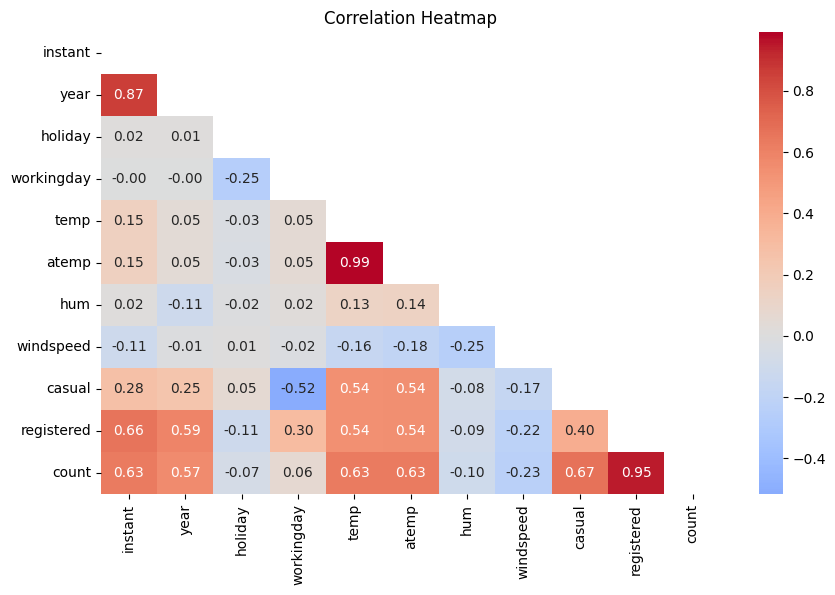

In [62]:
#Membuat heatmap korelasi untuk memvisualisasikan hubungan antara penyewa kasual, terdaftar, dan jumlah penyewa
fig, ax = plt.subplots(figsize=(10, 6))
correlation_matrix = day_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="coolwarm",
    center=0,
    fmt=".2f"
)
plt.title("Correlation Heatmap")
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren jumlah penyewaan sepeda dalam beberapa tahun terakhir?

In [71]:
monthly_rent_df = day_df.resample(rule='M', on='dateday').agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"
})
# Change index format to month-year (Jan-20, Feb-20, etc.)
monthly_rent_df.index = monthly_rent_df.index.strftime('%b-%y')
monthly_rent_df = monthly_rent_df.reset_index()
monthly_rent_df

C:\Users\user\AppData\Local\Temp\ipykernel_5708\3981368960.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_rent_df = day_df.resample(rule='M', on='dateday').agg({


,dateday,casual,registered,count
0,Jan-11,3073,35116,38189
1,Feb-11,6242,41973,48215
2,Mar-11,12826,51219,64045
3,Apr-11,22346,72524,94870
4,May-11,31050,104771,135821
5,Jun-11,30612,112900,143512
6,Jul-11,36452,104889,141341
7,Aug-11,28842,107849,136691
8,Sep-11,26545,100873,127418
9,Oct-11,25222,98289,123511


In [73]:
monthly_rent_df['count'] = monthly_rent_df['casual'] + monthly_rent_df['registered']
fig = px.bar(monthly_rent_df,
             x='dateday',
             y=['casual', 'registered', 'count'],
             barmode='group',
             color_discrete_sequence=["#FF69B4", "#00FF00", "#0000FF"],
             title="Bike Rental Trends in Recent Years",
             labels={'casual': 'Casual Rentals', 'registered': 'Registered Rentals', 'count': 'Total Rides'})

# Displaying the figure
fig.update_layout(xaxis_title='', yaxis_title='Total Rentals',
                  xaxis=dict(showgrid=False, showline=True, linecolor='rgb(204, 204, 204)', linewidth=2, mirror=True),
                  yaxis=dict(showgrid=False, zeroline=False, showline=True, linecolor='rgb(204, 204, 204)', linewidth=2, mirror=True),
                  plot_bgcolor='rgba(255, 255, 255, 0)',
                  showlegend=True,
                  legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1))

fig.show()

* Terdapat peningkatan jumlah penyewaan sepeda dari tahun 2011 ke tahun 2012.
* Puncak penyewaan terjadi pada September 2012, yang menandakan adanya kemungkinan faktor musiman atau promosi yang menarik perhatian pengguna pada bulan tersebut.
* Bulan Januari 2012 mencatat jumlah penyewaan terendah, yang mungkin disebabkan oleh faktor cuaca atau aktivitas pengguna yang cenderung menurun di awal tahun.
* Pada tahun 2011, puncak penyewaan terjadi pada Juni, sementara Januari juga tercatat sebagai bulan dengan penyewaan terendah. Ini menunjukkan bahwa terdapat pola musiman dalam penggunaan sepeda, di mana pengguna lebih aktif di bulan-bulan tertentu (seperti Juni dan September).




### Pertanyaan 2: Apakah kondisi cuaca mempengaruhi jumlah pengguna sepeda?

In [74]:
fig = px.box(day_df, x='weathersit', y='count', color='weathersit',
             title='Bike Users Distribution Based on Weather Condition',
             labels={'weathersit': 'Weather Condition', 'count': 'Total Rentals'})

# Display the plot
fig.show()

**Insight:**
- Berdasarkan hasil box plot, dapat disimpulkan bahwa cuaca yang cerah atau sebagian cerah ("Clear/Partly Cloudy") cenderung menarik lebih banyak penyewa sepeda
- diikuti oleh kondisi cuaca "Misty/Cloudy".
- Sementara itu, kondisi cuaca "Light Snow/Rain" menunjukkan jumlah penyewa sepeda yang paling sedikit. Temuan ini menunjukkan bahwa cuaca memiliki pengaruh yang signifikan terhadap penggunaan sepeda.

### Pertanyaan 3: Pukul Berapa jumlah pengguna sepeda tertinggi dan terendah

In [79]:
sum_byhour_df = hour_df.groupby("hr")["count"].sum().sort_values(ascending=False).reset_index()
sum_byhour_df

,hr,count
0,17,336860
1,18,309772
2,8,261001
3,16,227748
4,19,226789
5,13,184919
6,12,184414
7,15,183149
8,14,175652
9,20,164550


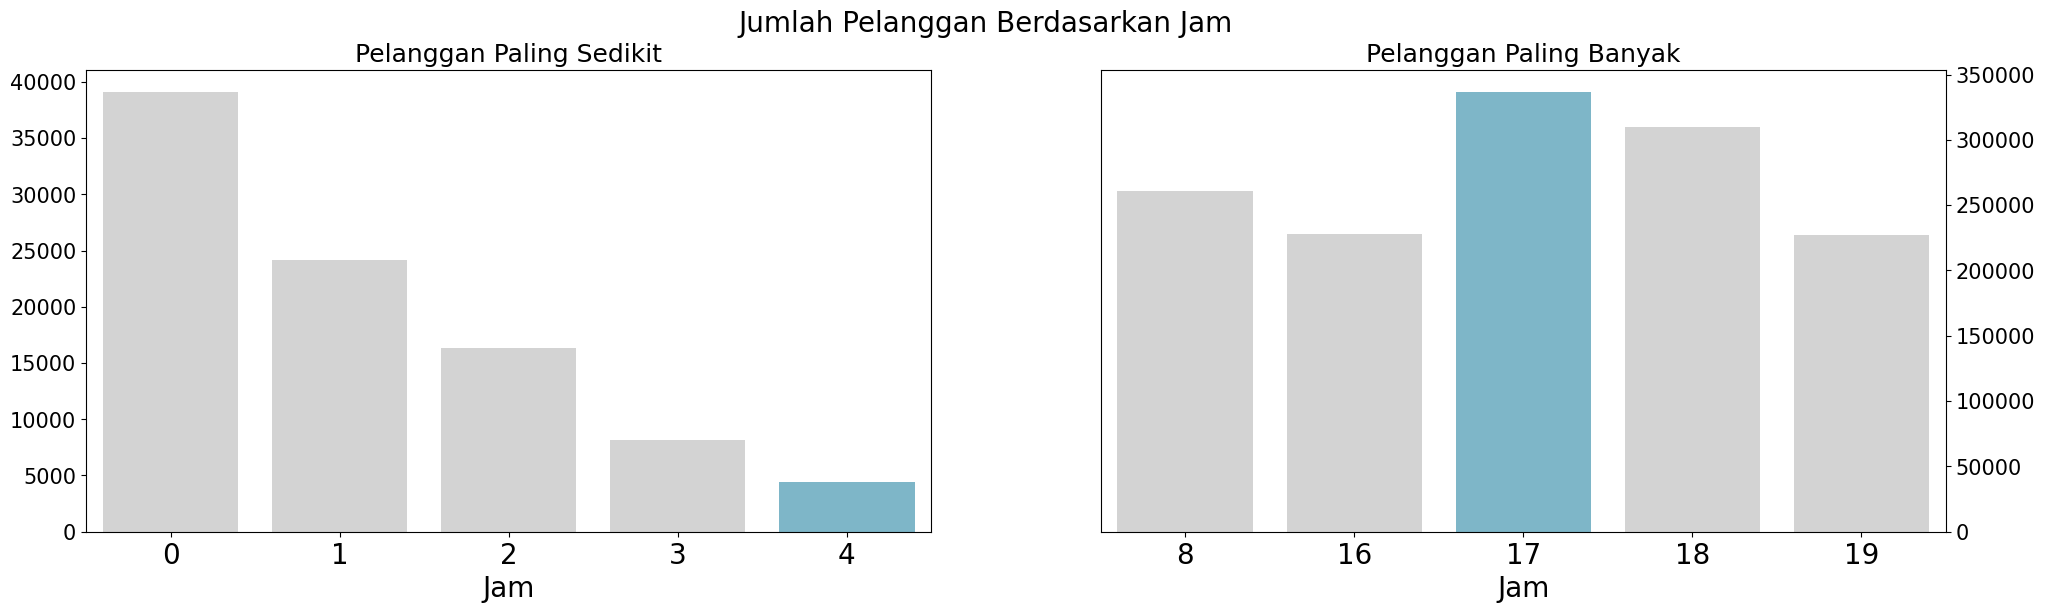

In [82]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

# First plot: Pelanggan Paling Sedikit
sns.barplot(
    x="hr", y="count", hue="hr",
    data=sum_byhour_df.sort_values(by="hr", ascending=True).head(5), 
    palette=["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#72BCD4"], 
    ax=ax[0], legend=False
)
ax[0].set_ylabel(None)
ax[0].set_xlabel("Jam", fontsize=20)
ax[0].yaxis.set_label_position("right")
ax[0].set_title("Pelanggan Paling Sedikit", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=20)
ax[0].tick_params(axis='y', labelsize=15)

# Second plot: Pelanggan Paling Banyak
sns.barplot(
    x="hr", y="count", hue="hr",
    data=sum_byhour_df.head(5), 
    palette=["#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3", "#D3D3D3"], 
    ax=ax[1], legend=False
)
ax[1].set_ylabel(None)
ax[1].set_xlabel("Jam", fontsize=20)
ax[1].set_title("Pelanggan Paling Banyak", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=20)
ax[1].tick_params(axis='y', labelsize=15)
ax[1].yaxis.tick_right()

plt.suptitle("Jumlah Pelanggan Berdasarkan Jam", fontsize=20)
plt.show()

Visualisasi pertama menampilkan jam-jam dengan jumlah pelanggan paling sedikit, yaitu dari jam 0 hingga jam 4. Dalam plot ini, jam 4 diwarnai biru untuk menandai jam dengan pelanggan paling sedikit, sementara jam lainnya diberi warna abu-abu. Pola ini mencerminkan bahwa aktivitas pelanggan terendah terjadi pada dini hari, dengan jam 4 sebagai titik terendah dalam jumlah pelanggan. Sebaliknya, visualisasi kedua menunjukkan jam-jam dengan jumlah pelanggan terbanyak, yaitu antara jam 8 hingga jam 19, dengan jam 17 ditandai biru sebagai puncak jumlah pelanggan. Plot ini mengindikasikan bahwa aktivitas tertinggi terjadi pada jam-jam sibuk, khususnya jam 17, yang kemungkinan besar terkait dengan jam pulang kerja atau waktu ramai lainnya.

## Analisis Lanjutan (Opsional)

## Conclusion

-  Conclusion pertanyaan 1: Terdapat peningkatan jumlah penyewaan sepeda dari tahun 2011 ke tahun 2012. Puncak penyewaan terjadi pada September 2012, yang menunjukkan adanya kemungkinan faktor musiman atau promosi yang menarik perhatian pengguna pada bulan tersebut. Bulan Januari 2012 mencatat jumlah penyewaan terendah, yang mungkin dipengaruhi oleh faktor cuaca atau aktivitas pengguna yang cenderung menurun di awal tahun. Pada tahun 2011, puncak penyewaan terjadi pada Juni, sementara Januari juga tercatat sebagai bulan dengan penyewaan terendah.
- Conclusion pertanyaan 2: Kondisi cuaca memang mempengaruhi jumlah pengguna sepeda
- Conclusion pertanyaan 3 : Visualisasi pertama menampilkan jam-jam dengan jumlah pelanggan paling sedikit, yaitu dari jam 0 hingga jam 4. Pola ini mencerminkan bahwa aktivitas pelanggan terendah terjadi pada dini hari, dengan jam 4 sebagai titik terendah dalam jumlah pelanggan. Sebaliknya, visualisasi kedua menunjukkan jam-jam dengan jumlah pelanggan terbanyak, yaitu antara jam 08:00 hingga jam 19:00, dengan jam 17 ditandai biru sebagai puncak jumlah pelanggan. Plot ini mengindikasikan bahwa aktivitas tertinggi terjadi pada jam-jam sibuk, khususnya jam 17:00, yang kemungkinan besar terkait dengan jam pulang kerja atau waktu ramai lainnya.